CNN for MNIST dataset

In [0]:
# libs
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [0]:
batch_size = 32
test_batch_size = 1000
epochs = 14
lr = 1.0
seed = 1
log_interval = 100
loss_function = nn.NLLLoss(reduction='sum')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)

        output = F.log_softmax(x, dim=1)
        return output

In [0]:
# functions to training and testing model
def train(model, device, train_loader, optimizer, epoch, loss_function):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        
        '''
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        '''

def test(model, device, test_loader, loss_function):
    print("start testing")
    model.eval()
    test_loss = 0
    correct = 0
    cnt = 0
    with torch.no_grad():
        for data, target in test_loader:
            #if cnt>=10:
            #  break
            data, target = data.to(device), target.to(device)
            output = model(data)
            cnt+=1
            #plt.figure(cnt)
            #plt.imshow(data.to("cpu")[0].view(28,28))
            #print("target: "+str(target[0]))

            test_loss += loss_function(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            #print("pred: ")
            #print(str(pred[0]))

            #print("output")
            output = output.exp()
            #print(str(output[0])+"\n")
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [52]:
# training network for mnist dataset
def problem1_1():
    # Training settings
   
    
    use_cuda = torch.cuda.is_available()

    torch.manual_seed(seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=test_batch_size, shuffle=True, **kwargs)

    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=lr)

    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, loss_function)
        test(model, device, test_loader, loss_function)

    return model


mnist_model = problem1_1()

start testing

Test set: Average loss: 0.0550, Accuracy: 9826/10000 (98%)

start testing

Test set: Average loss: 0.0486, Accuracy: 9845/10000 (98%)

start testing

Test set: Average loss: 0.0482, Accuracy: 9849/10000 (98%)

start testing

Test set: Average loss: 0.0452, Accuracy: 9867/10000 (99%)

start testing

Test set: Average loss: 0.0499, Accuracy: 9864/10000 (99%)

start testing

Test set: Average loss: 0.0544, Accuracy: 9851/10000 (99%)

start testing

Test set: Average loss: 0.0582, Accuracy: 9842/10000 (98%)

start testing

Test set: Average loss: 0.0516, Accuracy: 9864/10000 (99%)

start testing

Test set: Average loss: 0.0583, Accuracy: 9830/10000 (98%)

start testing

Test set: Average loss: 0.0612, Accuracy: 9833/10000 (98%)

start testing

Test set: Average loss: 0.0717, Accuracy: 9835/10000 (98%)

start testing

Test set: Average loss: 0.0678, Accuracy: 9841/10000 (98%)

start testing

Test set: Average loss: 0.0926, Accuracy: 9804/10000 (98%)

start testing

Test set: 

CNN for fashion MNIST dataset

In [0]:
# hyperparameters for fasion mnist
batch_size = 32
test_batch_size = 1000
epochs = 14
lr_fashion = 1
seed = 1
log_interval = 10
loss_function = nn.CrossEntropyLoss(reduction='sum')

In [0]:
class FashionNet(nn.Module):
  def __init__(self,num_classes=10):
        super(FashionNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
  def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        output = F.log_softmax(out, dim=1)
        return output

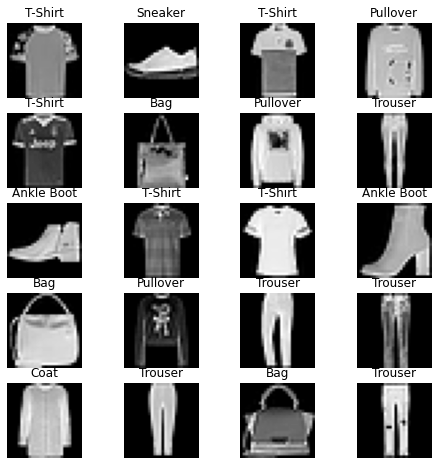

start testing

Test set: Average loss: 0.3421, Accuracy: 8730/10000 (87%)

start testing

Test set: Average loss: 0.2839, Accuracy: 8973/10000 (90%)

start testing

Test set: Average loss: 0.2745, Accuracy: 9005/10000 (90%)

start testing

Test set: Average loss: 0.2758, Accuracy: 9024/10000 (90%)

start testing

Test set: Average loss: 0.2883, Accuracy: 8991/10000 (90%)

start testing

Test set: Average loss: 0.2790, Accuracy: 9071/10000 (91%)

start testing

Test set: Average loss: 0.2987, Accuracy: 9030/10000 (90%)

start testing

Test set: Average loss: 0.2920, Accuracy: 8957/10000 (90%)

start testing

Test set: Average loss: 0.2730, Accuracy: 9082/10000 (91%)

start testing

Test set: Average loss: 0.2852, Accuracy: 9066/10000 (91%)

start testing

Test set: Average loss: 0.2725, Accuracy: 9106/10000 (91%)

start testing

Test set: Average loss: 0.2676, Accuracy: 9081/10000 (91%)

start testing

Test set: Average loss: 0.2802, Accuracy: 9108/10000 (91%)

start testing

Test set: 

In [55]:
# training network for fashion mnist dataset
def problem1_2():
    # Training settings
   
    
    use_cuda = torch.cuda.is_available()

    torch.manual_seed(seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}


    train_dataset = datasets.FashionMNIST('../data', train=True, download=True,
                       transform = transforms.ToTensor()
                       )
    
    test_dataset = datasets.FashionMNIST('../data', train=False, download=True,
                       transform = transforms.ToTensor()
                       )
    labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
    fig = plt.figure(figsize=(8,8));
    columns = 4;
    rows = 5;
    for i in range(1, columns*rows +1):
        img_xy = np.random.randint(len(test_dataset));
        img = test_dataset[img_xy][0][0,:,:]
        fig.add_subplot(rows, columns, i)
        plt.title(labels_map[test_dataset[img_xy][1]])
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    plt.show()


    
    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('../data', train=True, download=True,
                       transform = transforms.ToTensor()
                       ),
        batch_size=batch_size, shuffle=True, **kwargs)
     
    test_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('../data', train=False, download=True,
                       transform = transforms.ToTensor()
                       ),
        batch_size=test_batch_size, shuffle=True, **kwargs)

    model = FashionNet().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=lr_fashion)

    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, loss_function)
        test(model, device, test_loader, loss_function)
    return model
    
fashion_mnist_model = problem1_2()

In [0]:
def test_and_return_per_class_result(model, device, test_loader, loss_function):
    model.eval()
    test_loss = 0
    correct = 0
    data_cnt = [0 for i in range(0, 10)]
    correct_data_cnt = [0 for i in range(0, 10)]

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_function(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            
            target = target.view_as(pred)
            for i in range(pred.shape[0]):
              data_cnt[target[i]] +=1
              if target[i]==pred[i]:
                 correct_data_cnt[pred[i]] +=1

          
            
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    print(correct_data_cnt)
    print(data_cnt)
    for i in range(0, 10):
       class_i_correctness = 100. * correct_data_cnt[i]/data_cnt[i]
       class_i_correctness = round(class_i_correctness, 2)
       print("accuracy for class "+str(i)+": "+str(class_i_correctness)+"%")


In [57]:
# testing Fashion MNIST data on network trained for MNIST dataset
def problem2_1():
    # Training settings
   
    
    use_cuda = torch.cuda.is_available()

    torch.manual_seed(seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
   
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, download=True,
                       transform = transforms.ToTensor()
                       ),
        batch_size=test_batch_size, shuffle=True, **kwargs)

    model = fashion_mnist_model
    optimizer = optim.Adadelta(model.parameters(), lr=lr_fashion)

    print("Fashion MNIST data accuracy on model trained for MNIST data")
    test_and_return_per_class_result(model, device, test_loader, loss_function)
    
problem2_1()

Fashion MNIST data accuracy on model trained for MNIST data

Test set: Average loss: 15.3920, Accuracy: 1191/10000 (12%)

[11, 267, 0, 101, 1, 747, 0, 26, 34, 4]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
accuracy for class 0: 1.12%
accuracy for class 1: 23.52%
accuracy for class 2: 0.0%
accuracy for class 3: 10.0%
accuracy for class 4: 0.1%
accuracy for class 5: 83.74%
accuracy for class 6: 0.0%
accuracy for class 7: 2.53%
accuracy for class 8: 3.49%
accuracy for class 9: 0.4%


In [58]:
# testing MNIST data on network trained for fashion mnist dataset
def problem2_2():
    # Training settings
   
    
    use_cuda = torch.cuda.is_available()

    torch.manual_seed(seed)

    device = torch.device("cuda" if use_cuda else "cpu")
    
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}


    test_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('../data', train=False, download=True,
                       transform = transforms.ToTensor()
                       ),
        batch_size=test_batch_size, shuffle=True, **kwargs)

    model = mnist_model
    optimizer = optim.Adadelta(model.parameters(), lr=lr_fashion)

    print("MNIST data accuracy on model trained for Fashion MNIST data")
    test_and_return_per_class_result(model, device, test_loader, loss_function)
    
problem2_2()

MNIST data accuracy on model trained for Fashion MNIST data

Test set: Average loss: 2.5293, Accuracy: 1000/10000 (10%)

[0, 1000, 0, 0, 0, 0, 0, 0, 0, 0]
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
accuracy for class 0: 0.0%
accuracy for class 1: 100.0%
accuracy for class 2: 0.0%
accuracy for class 3: 0.0%
accuracy for class 4: 0.0%
accuracy for class 5: 0.0%
accuracy for class 6: 0.0%
accuracy for class 7: 0.0%
accuracy for class 8: 0.0%
accuracy for class 9: 0.0%


In [59]:
# preprocess data
def preprocess_data():
    fashion_mnist_testset =  datasets.FashionMNIST('../data', train=False, download=True,
                       transform = transforms.ToTensor()
                       )
    
    fashion_length = len(fashion_mnist_testset)

    #mnist_testset = datasets.MNIST('../data', train=False, download=True,
    #                   transform = transforms.ToTensor()
    #                   )
    
    mnist_testset = datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

    
    mnist_length = len(mnist_testset)

   
    X = torch.zeros(1, 28, 28)
    target = []
    fashion_or_mnist = []  #1 means come from fashion mnist, 0 means come from mnist

    for i in range(0, fashion_length):
       if i %1000==0:
         print("preprocessed "+str(i))
       X = torch.cat((X, fashion_mnist_testset[i][0]),0)
       target.append(fashion_mnist_testset[i][1])
       fashion_or_mnist.append(1)

    X = X[1:len(X)]
    for i in range(0, mnist_length):
       if i%1000==0:
         print("preprocessed "+str(i))
       X = torch.cat((X, mnist_testset[i][0]),0)
       target.append(mnist_testset[i][1])
       fashion_or_mnist.append(0)

    target = torch.tensor(target)
    fashion_or_mnist = torch.tensor(fashion_or_mnist)

    print(X.shape)
    print(target.shape)
    print(fashion_or_mnist.shape)
    return (X, target, fashion_or_mnist)

X, target, fashion_or_mnist = preprocess_data()


preprocessed 0
preprocessed 1000
preprocessed 2000
preprocessed 3000
preprocessed 4000
preprocessed 5000
preprocessed 6000
preprocessed 7000
preprocessed 8000
preprocessed 9000
preprocessed 0
preprocessed 1000
preprocessed 2000
preprocessed 3000
preprocessed 4000
preprocessed 5000
preprocessed 6000
preprocessed 7000
preprocessed 8000
preprocessed 9000
torch.Size([20000, 28, 28])
torch.Size([20000])
torch.Size([20000])


In [0]:
# customize dataset
def customize_stream_dataset(data, data_setting):
    
    '''
    data_setting=1: F10000, M10000
    data_setting=2: F2000, M1000, F2000, M1000...
    data_setting=3: F1000, M1000, F1000, M1000...
    data_setting=4: F200, M1000, F100, M500, F200, M1000, F100, M500...
    data_setting=5: M10000, F10000
    data_setting=6: M2000, F1000, M2000, F1000...
    data_setting=7: M1000, F1000, M1000, F1000...
    data_setting=8: M200, F1000, M100, F500, M200, F1000, M100, F500...
    '''
    if data_setting<1 or data_setting>9:
        print("invalid setting, please input a valid setting between 1-9")
        return
    
    
    
    X, target, fashion_or_mnist = data

    idx = []
    if data_setting==1:
      idx = [i for i in range(0, 20000)]
    
    if data_setting==2:
        print("data setting=2")
        current_fashion_idx = 0
        current_mnist_idx = 10000
        while current_fashion_idx<10000:
          for i in range(0, 2000):
            idx.append(current_fashion_idx)
            current_fashion_idx +=1
          for i in range(0, 1000):
            idx.append(current_mnist_idx)
            current_mnist_idx +=1
    
    if data_setting==3:
        print("data setting=3")
        current_fashion_idx = 0
        current_mnist_idx = 10000
        while current_fashion_idx<10000:
          for i in range(0, 1000):
            idx.append(current_fashion_idx)
            current_fashion_idx +=1
          for i in range(0, 1000):
            idx.append(current_mnist_idx)
            current_mnist_idx +=1
    
    if data_setting==4:
        
        print("data setting=4")
        current_fashion_idx = 0
        current_mnist_idx = 10000
        while current_mnist_idx<20000 :
          for i in range(0, 200):
            idx.append(current_fashion_idx)
            current_fashion_idx +=1
          
          for i in range(0, 1000):
            idx.append(current_mnist_idx)
            current_mnist_idx +=1
          if current_mnist_idx>=19999:
            break

          for i in range(0, 100):
            idx.append(current_fashion_idx)
            current_fashion_idx +=1
          
          for i in range(0, 500):
            idx.append(current_mnist_idx)
            current_mnist_idx +=1
          if current_mnist_idx>=19999:
            break
      
    if data_setting==5:
      print("data setting=5")
      idx = [i for i in range(10000, 20000)]
      idx = idx + [i for i in range(0, 10000)]
      
    
    if data_setting==6:
        print("data setting=6")
        current_mnist_idx = 10000
        current_fashion_idx = 0
        while current_mnist_idx<20000:
          for i in range(0, 2000):
            idx.append(current_mnist_idx)
            current_mnist_idx +=1
          for i in range(0, 1000):
            idx.append(current_fashion_idx)
            current_fashion_idx +=1
    
    if data_setting==7:
        print("data setting=7")
        current_mnist_idx = 10000
        current_fashion_idx = 0
        while current_mnist_idx<20000:
          for i in range(0, 1000):
            idx.append(current_mnist_idx)
            current_mnist_idx +=1
          for i in range(0, 1000):
            idx.append(current_fashion_idx)
            current_fashion_idx +=1
    
    if data_setting==8:
        
        print("data setting=8")
        current_mnist_idx = 10000
        current_fashion_idx = 0
        while current_fashion_idx<10000 :
          for i in range(0, 200):
            idx.append(current_mnist_idx)
            current_mnist_idx +=1
          
          for i in range(0, 1000):
            idx.append(current_fashion_idx)
            current_fashion_idx +=1
          if current_fashion_idx>=9999:
            break

          for i in range(0, 100):
            idx.append(current_mnist_idx)
            current_mnist_idx +=1
          
          for i in range(0, 500):
            idx.append(current_fashion_idx)
            current_fashion_idx +=1
          if current_fashion_idx>=9999:
            break
    
    if data_setting==9:
        print("data setting=9")
        current_mnist_idx = 10000
        current_fashion_idx = 0
        while current_mnist_idx<20000 :
          idx.append(current_mnist_idx)
          current_mnist_idx +=1
          
          idx.append(current_fashion_idx)
          current_fashion_idx +=1
        



    test_ds = TensorDataset(
          X[idx].float(),
          target[idx].float(),
          fashion_or_mnist[idx].float()
    )
    print("test dataset length:")
    print(len(test_ds))
    return test_ds
          
          
# customize dataloader
def get_dataloader(data, batch_size):

    test_ds = data
    test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)
    return test_dl



In [0]:
'''
for k in range(1, 8+1):
  print("start precessing setting "+str(k))
  cnt = 1
  test_ds = customize_stream_dataset((X, target, fashion_or_mnist),k)
  length = len(test_ds)
  rows = 100
  cols = 40
  for i in range(1, cols+1):
    for j in range(1, rows+1):
      plt.subplot(cols, rows, cnt)
      plt.imshow(test_ds[cnt-1][0].numpy(), cmap='gray')
      plt.axis('off')
      cnt +=1
      if cnt%100==0:
        print("processing "+str(cnt))
  plt.savefig("/a_result/datasetting_"+str(k)+".png", dpi=600)  
'''


In [0]:

# plotting streams of data to test whether the dataloader works properly
cnt = 1
for i in range(1, 5+1):
  for j in range(1,5+1):
    plt.subplot(5, 5, cnt)
    plt.imshow(test_ds[cnt-1+10000][0].numpy(), cmap='gray')
    plt.axis('off')
    cnt +=1
plt.show()
#plt.savefig("/a_result/datasetting_5.png")

In [0]:
# Since the output of our two network is [0,1,2,...,9], we define the loss as the following
def Loss_0_or_1(p, q):
  if p==q:
    return 0
  else:
    return 1

In [0]:
# static expert code for two networks
# it will compute expert prediction for each trial under two experts
def static_expert(dataset, data_setting, model1, model2):
  print("data setting="+str(data_setting))

  (X, target_ds, fashion_or_mnist) = dataset
  test_ds = customize_stream_dataset((X, target_ds, fashion_or_mnist),data_setting)
  data_loader = get_dataloader(test_ds, 1)

  print("static expert starts")
  device = torch.device("cuda")

  w1 = 1.0/2
  w2 = 1.0/2
  c = 2  # we choose squared loss for expert advice algorithm
  eta = 1.0

  t = 1
  correct = 0
  accu = 0

  for data, target, _ in data_loader:
      data = data.view(1,1,28,28)
      if t%5000==0:
        print("trial: "+str(t))
   

      data, y_t,  = data.to(device), target.to(device)
      
      # step1: predict
      v1 = w1/(w1+w2)
      v2 = w2/(w1+w2)
      print(str(v1)+" "+str(v2))

      #the prediction result may be a float number not interger number, prediction rule is defined as the following
      output1 = model1(data)
      pred1 = output1.argmax(dim=1, keepdim=True)
      output2 = model2(data)
      pred2 = output2.argmax(dim=1, keepdim=True)

      pred = -1
      if v1>=v2:
        pred = pred1
      else:
        pred = pred2
      
      # step2: loss update
      loss = Loss_0_or_1(y_t, pred)
      #print(y_t)
      #print(pred)
      
      w_m_1 = w1*np.exp(-eta*loss)
      w_m_2 = w2*np.exp(-eta*loss)

      # step3: share update
      w1 = w_m_1
      w2 = w_m_2

      correct += (1-loss)
      if t%5000==0:
        accu = float(correct)/t
        print("current accuracy: "+str(round(accu,2)))
      
      t +=1
  
  print("data setting="+str(data_setting)+", accuracy of static expert advice: "+str(round(accu,2))+"\n")
  return round(accu, 2)

result_list1 = [abs]
for i in range(1, 8+1):
  result = static_expert(((X, target, fashion_or_mnist)), i, fashion_mnist_model, mnist_model)
  result_list1.append(result)
print(result_list1)

#static_expert(((X, target, fashion_or_mnist)), 5, fashion_mnist_model, mnist_model)

In [0]:
# fixed share alpha expert advice code for two networks
# it will compute expert prediction for each trial under two experts
def fixed_share_alpha_expert_advice1(dataset, data_setting, alpha, model1, model2):
  print("data setting="+str(data_setting))

  (X, target_ds, fashion_or_mnist) = dataset
  test_ds = customize_stream_dataset((X, target_ds, fashion_or_mnist),data_setting)
  data_loader = get_dataloader(test_ds, 1)

  print("static expert starts")
  device = torch.device("cuda")

  w1 = 1.0/2
  w2 = 1.0/2
  c = 2  # we choose squared loss for expert advice algorithm
  eta = 1.0/2

  t = 1
  correct = 0
  accu = 0

  for data, target, _ in data_loader:
      data = data.view(1,1,28,28)
      if t%5000==0:
        print("trial: "+str(t))
   

      data, y_t,  = data.to(device), target.to(device)
      
      # step1: predict
      v1 = w1/(w1+w2)
      v2 = w2/(w1+w2)
      #print(str(v1)+" "+str(v2))
      #the prediction result may be a float number not interger number, prediction rule is defined as the following
      output1 = model1(data)
      pred1 = output1.argmax(dim=1, keepdim=True)
      output2 = model2(data)
      pred2 = output2.argmax(dim=1, keepdim=True)

      pred = -1
      if v1>=v2:
        pred = pred1
      else:
        pred = pred2
      
      # step2: loss update
      loss = Loss_0_or_1(y_t, pred)
      #print(y_t)
      #print(pred)
      
      w_m_1 = w1*np.exp(-eta*loss)
      w_m_2 = w2*np.exp(-eta*loss)

      # step3: share update
      pool = (w_m_1+w_m_2)*alpha
      w1 = (1-alpha)*w_m_1+(pool-alpha*w_m_1)
      w2 = (1-alpha)*w_m_2+(pool-alpha*w_m_2)

      correct += (1-loss)
      if t%5000==0:
        accu = float(correct)/t
        print("current accuracy: "+str(round(accu,2)))
      
      t +=1
  
  print("data setting="+str(data_setting)+", accuracy of static expert advice: "+str(round(accu,2))+"\n")
  return round(accu, 2)


**Algorithm 1 with static expert(alpha=0) for all data settings**

In [118]:
result_list1 = []
result1 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 1, 0, fashion_mnist_model, mnist_model)
result2 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 2, 0, fashion_mnist_model, mnist_model)
result3 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 3, 0, fashion_mnist_model, mnist_model)
result4 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 4, 0, fashion_mnist_model, mnist_model)
result5 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 5, 0, fashion_mnist_model, mnist_model)
result6 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 6, 0, fashion_mnist_model, mnist_model)
result7 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 7, 0, fashion_mnist_model, mnist_model)
result8 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 8, 0, fashion_mnist_model, mnist_model)

result_list1.append(result1)
result_list1.append(result2)
result_list1.append(result3)
result_list1.append(result4)
result_list1.append(result5)
result_list1.append(result6)
result_list1.append(result7)
result_list1.append(result8)


print(result_list1)

data setting=1
test dataset length:
20000
static expert starts
trial: 5000
current accuracy: 0.91
trial: 10000
current accuracy: 0.91
trial: 15000
current accuracy: 0.64
trial: 20000
current accuracy: 0.5
data setting=1, accuracy of static expert advice: 0.5

data setting=2
data setting=2
test dataset length:
15000
static expert starts
trial: 5000
current accuracy: 0.75
trial: 10000
current accuracy: 0.67
trial: 15000
current accuracy: 0.64
data setting=2, accuracy of static expert advice: 0.64

data setting=3
data setting=3
test dataset length:
20000
static expert starts
trial: 5000
current accuracy: 0.59
trial: 10000
current accuracy: 0.5
trial: 15000
current accuracy: 0.53
trial: 20000
current accuracy: 0.5
data setting=3, accuracy of static expert advice: 0.5

data setting=4
data setting=4
test dataset length:
12000
static expert starts
trial: 5000
current accuracy: 0.25
trial: 10000
current accuracy: 0.23
data setting=4, accuracy of static expert advice: 0.23

data setting=5
data 

In [0]:
Algorithm 1 with fixed share alpha expert advice for all data settings

In [117]:
result_list1 = []
result1 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 1, 3.0/20000, fashion_mnist_model, mnist_model)
result2 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 2, 10.0/15000, fashion_mnist_model, mnist_model)
result3 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 3, 18.0/20000, fashion_mnist_model, mnist_model)
result4 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 4, 25.0/12000, fashion_mnist_model, mnist_model)
result5 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 5, 3.0/20000, fashion_mnist_model, mnist_model)
result6 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 6, 10.0/15000, fashion_mnist_model, mnist_model)
result7 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 7, 18.0/20000, fashion_mnist_model, mnist_model)
result8 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 8, 25.0/12000, fashion_mnist_model, mnist_model)

result_list1.append(result1)
result_list1.append(result2)
result_list1.append(result3)
result_list1.append(result4)
result_list1.append(result5)
result_list1.append(result6)
result_list1.append(result7)
result_list1.append(result8)


print(result_list1)

data setting=1
test dataset length:
20000
static expert starts
trial: 5000
current accuracy: 0.91
trial: 10000
current accuracy: 0.91
trial: 15000
current accuracy: 0.64
trial: 20000
current accuracy: 0.5
data setting=1, accuracy of static expert advice: 0.5

data setting=2
data setting=2
test dataset length:
15000
static expert starts
trial: 5000
current accuracy: 0.75
trial: 10000
current accuracy: 0.67
trial: 15000
current accuracy: 0.64
data setting=2, accuracy of static expert advice: 0.64

data setting=3
data setting=3
test dataset length:
20000
static expert starts
trial: 5000
current accuracy: 0.59
trial: 10000
current accuracy: 0.5
trial: 15000
current accuracy: 0.53
trial: 20000
current accuracy: 0.5
data setting=3, accuracy of static expert advice: 0.5

data setting=4
data setting=4
test dataset length:
12000
static expert starts
trial: 5000
current accuracy: 0.25
trial: 10000
current accuracy: 0.23
data setting=4, accuracy of static expert advice: 0.23

data setting=5
data 

In [0]:
def Loss_MSE(p, q):
  return F.mse_loss(p, q)

In [0]:
# static expert code for two networks
#it will compute expert prediction for each trial under two experts
def fixed_share_alpha_expert_advice2(dataset, data_setting, alpha, model1, model2):
  print("data setting="+str(data_setting))

  (X, target_ds, fashion_or_mnist) = dataset  
  test_ds = customize_stream_dataset((X, target_ds, fashion_or_mnist),data_setting)
  data_loader = get_dataloader(test_ds, 1)

  print("fixed alpha="+str(alpha)+" expert advice starts")
  device = torch.device("cuda")
  
  w1 = 1.0/2
  w2 = 1.0/2
  c = 2  # we choose squared loss for expert advice algorithm
  eta = 1.0/2
  t = 1
  correct = 0
  accu = 0
  with torch.no_grad():
      for data, target, fashion_or_mnist in data_loader:
          data = data.view(1,1,28,28)
          

          if t%1000==0:
            print("trial: "+str(t))
      

          data, y_t,  = data.to(device), target.to(device)
           
          # step1: predict
          v1 = w1/(w1+w2)
          v2 = w2/(w1+w2)

         
         

          # model1 is fashion mnist model
          output1 = model1(data)
          output1 = torch.exp(output1)
          output1_temp = torch.zeros(1,10).to(device)
          output1 = torch.cat((output1, output1_temp), 1)


          # model2 is mnist model
          output2 = model2(data)
          output2 = torch.exp(output2)
          output2_temp = torch.zeros(1,10).to(device)
          output2 = torch.cat((output2_temp, output2), 1)
         

          #print(str(t)+": "+str(float(v1))+" "+str(float(v2)))
          
          pred = torch.zeros(1,20)
          
          if v1>=v2:
            pred = output1
          else:
            pred = output2

        
          y_t_temp = 0
          if fashion_or_mnist.item()==0:
            y_t_temp=10
          y_t += y_t_temp

          pred_label = pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
          correct += pred_label.eq(y_t.view_as(pred_label)).sum().item()
          
          
      
          # step2: loss update

          target = torch.zeros(1, 20)
          target[0][int(y_t.item())] = 1
          target = target.to(device)
          

          loss1 = Loss_MSE(target, output1)
          loss2 = Loss_MSE(target, output2)
        
          
          w_m_1 = w1*torch.exp(-eta*loss1)
          w_m_2 = w2*torch.exp(-eta*loss2)


          # step3: share update

          pool = alpha*(w_m_1+w_m_2)
          w1 = (1-alpha)*w_m_1+(pool-alpha*w_m_1)
          w2 = (1-alpha)*w_m_2+(pool-alpha*w_m_2)



          if t%1000==0:
            accu = float(correct)/t
            print("current accuracy: "+str(round(accu,2)))
          
          t +=1
  
  print("data setting="+str(data_setting)+", accuracy of static expert advice: "+str(round(accu,2))+"\n")
  return round(accu, 2)






**Algorithm2 with static expert(alpha=0) for all data settings**

In [114]:
result_list1 = []
result1 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 1, 0, fashion_mnist_model, mnist_model)
result2 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 2, 0, fashion_mnist_model, mnist_model)
result3 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 3, 0, fashion_mnist_model, mnist_model)
result4 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 4, 0, fashion_mnist_model, mnist_model)
result5 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 5, 0, fashion_mnist_model, mnist_model)
result6 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 6, 0, fashion_mnist_model, mnist_model)
result7 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 7, 0, fashion_mnist_model, mnist_model)
result8 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 8, 0, fashion_mnist_model, mnist_model)


result_list1.append(result1)
result_list1.append(result2)
result_list1.append(result3)
result_list1.append(result4)
result_list1.append(result5)
result_list1.append(result6)
result_list1.append(result7)
result_list1.append(result8)

print(result_list1)

data setting=1
test dataset length:
20000
fixed alpha=0 expert advice starts
trial: 1000
current accuracy: 0.93
trial: 2000
current accuracy: 0.92
trial: 3000
current accuracy: 0.92
trial: 4000
current accuracy: 0.91
trial: 5000
current accuracy: 0.91
trial: 6000
current accuracy: 0.91
trial: 7000
current accuracy: 0.91
trial: 8000
current accuracy: 0.91
trial: 9000
current accuracy: 0.91
trial: 10000
current accuracy: 0.91
trial: 11000
current accuracy: 0.83
trial: 12000
current accuracy: 0.76
trial: 13000
current accuracy: 0.7
trial: 14000
current accuracy: 0.65
trial: 15000
current accuracy: 0.61
trial: 16000
current accuracy: 0.57
trial: 17000
current accuracy: 0.54
trial: 18000
current accuracy: 0.51
trial: 19000
current accuracy: 0.48
trial: 20000
current accuracy: 0.46
data setting=1, accuracy of static expert advice: 0.46

data setting=2
data setting=2
test dataset length:
15000
fixed alpha=0 expert advice starts
trial: 1000
current accuracy: 0.93
trial: 2000
current accuracy: 

**Algorithm2 with fixed share for all data settings**

In [116]:

result_list1 = []
result1 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 1, 3.0/20000, fashion_mnist_model, mnist_model)
result2 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 2, 10.0/15000, fashion_mnist_model, mnist_model)
result3 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 3, 18.0/20000, fashion_mnist_model, mnist_model)
result4 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 4, 25.0/12000, fashion_mnist_model, mnist_model)
result5 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 5, 3.0/20000, fashion_mnist_model, mnist_model)
result6 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 6, 10.0/15000, fashion_mnist_model, mnist_model)
result7 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 7, 18.0/20000, fashion_mnist_model, mnist_model)
result8 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 8, 25.0/12000, fashion_mnist_model, mnist_model)
result_list1.append(result1)
result_list1.append(result2)
result_list1.append(result3)
result_list1.append(result4)
result_list1.append(result5)
result_list1.append(result6)
result_list1.append(result7)
result_list1.append(result8)
print(result_list1)

data setting=1
test dataset length:
20000
fixed alpha=0.00015 expert advice starts
trial: 1000
current accuracy: 0.93
trial: 2000
current accuracy: 0.92
trial: 3000
current accuracy: 0.92
trial: 4000
current accuracy: 0.91
trial: 5000
current accuracy: 0.91
trial: 6000
current accuracy: 0.91
trial: 7000
current accuracy: 0.91
trial: 8000
current accuracy: 0.91
trial: 9000
current accuracy: 0.91
trial: 10000
current accuracy: 0.91
trial: 11000
current accuracy: 0.91
trial: 12000
current accuracy: 0.92
trial: 13000
current accuracy: 0.92
trial: 14000
current accuracy: 0.93
trial: 15000
current accuracy: 0.93
trial: 16000
current accuracy: 0.93
trial: 17000
current accuracy: 0.94
trial: 18000
current accuracy: 0.94
trial: 19000
current accuracy: 0.94
trial: 20000
current accuracy: 0.95
data setting=1, accuracy of static expert advice: 0.95

data setting=2
data setting=2
test dataset length:
15000
fixed alpha=0.0006666666666666666 expert advice starts
trial: 1000
current accuracy: 0.93
tri

In [0]:
# static expert code for two networks
#it will compute expert prediction for each trial under two experts
def fixed_share_alpha_expert_advice3(dataset, data_setting, alpha, model1, model2):
  print("data setting="+str(data_setting))

  (X, target_ds, fashion_or_mnist) = dataset  
  test_ds = customize_stream_dataset((X, target_ds, fashion_or_mnist),data_setting)
  data_loader = get_dataloader(test_ds, 1)

  print("fixed alpha="+str(alpha)+" expert advice starts")
  device = torch.device("cuda")
  
  w1 = 1.0/2
  w2 = 1.0/2
  c = 2  # we choose squared loss for expert advice algorithm
  eta = 1.0/2
  t = 1
  correct = 0
  accu = 0
  with torch.no_grad():
      for data, target, fashion_or_mnist in data_loader:
          data = data.view(1,1,28,28)
          

          if t%1000==0:
            print("trial: "+str(t))
      

          data, y_t,  = data.to(device), target.to(device)
           
          # step1: predict
          v1 = w1/(w1+w2)
          v2 = w2/(w1+w2)

         
         

          # model1 is fashion mnist model
          output1 = model1(data)
          output1 = torch.exp(output1)
          output1_temp = torch.zeros(1,10).to(device)
          output1 = torch.cat((output1, output1_temp), 1)


          # model2 is mnist model
          output2 = model2(data)
          output2 = torch.exp(output2)
          output2_temp = torch.zeros(1,10).to(device)
          output2 = torch.cat((output2_temp, output2), 1)
         

          #print(str(t)+": "+str(float(v1))+" "+str(float(v2)))
          
          pred = torch.zeros(1,20)
          pred = v1*output1+v2*output2

        
          y_t_temp = 0
          if fashion_or_mnist.item()==0:
            y_t_temp=10
          y_t += y_t_temp

          pred_label = pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
          correct += pred_label.eq(y_t.view_as(pred_label)).sum().item()
          
          
      
          # step2: loss update

          target = torch.zeros(1, 20)
          target[0][int(y_t.item())] = 1
          target = target.to(device)
          

          loss1 = Loss_MSE(target, output1)
          loss2 = Loss_MSE(target, output2)
        
          
          w_m_1 = w1*torch.exp(-eta*loss1)
          w_m_2 = w2*torch.exp(-eta*loss2)


          # step3: share update

          pool = alpha*(w_m_1+w_m_2)
          w1 = (1-alpha)*w_m_1+(pool-alpha*w_m_1)
          w2 = (1-alpha)*w_m_2+(pool-alpha*w_m_2)



          if t%1000==0:
            accu = float(correct)/t
            print("current accuracy: "+str(round(accu,2)))
          
          t +=1
  
  print("data setting="+str(data_setting)+", accuracy of static expert advice: "+str(round(accu,2))+"\n")
  return round(accu, 2)

Algorithm 3 with static expert（alpha=0） to deal with all data settings

In [110]:
result_list1 = []

result1 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 1, 0, fashion_mnist_model, mnist_model)
result2 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 2, 0, fashion_mnist_model, mnist_model)
result3 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 3, 0, fashion_mnist_model, mnist_model)
result4 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 4, 0, fashion_mnist_model, mnist_model)
result5 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 5, 0, fashion_mnist_model, mnist_model)
result6 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 6, 0, fashion_mnist_model, mnist_model)
result7 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 7, 0, fashion_mnist_model, mnist_model)
result8 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 8, 0, fashion_mnist_model, mnist_model)

result_list1.append(result1)
result_list1.append(result2)
result_list1.append(result3)
result_list1.append(result4)
result_list1.append(result5)
result_list1.append(result6)
result_list1.append(result7)
result_list1.append(result8)

print(result_list1)

data setting=1
test dataset length:
20000
fixed alpha=0 expert advice starts
trial: 1000
current accuracy: 0.93
trial: 2000
current accuracy: 0.92
trial: 3000
current accuracy: 0.92
trial: 4000
current accuracy: 0.91
trial: 5000
current accuracy: 0.91
trial: 6000
current accuracy: 0.91
trial: 7000
current accuracy: 0.91
trial: 8000
current accuracy: 0.91
trial: 9000
current accuracy: 0.91
trial: 10000
current accuracy: 0.91
trial: 11000
current accuracy: 0.83
trial: 12000
current accuracy: 0.78
trial: 13000
current accuracy: 0.76
trial: 14000
current accuracy: 0.73
trial: 15000
current accuracy: 0.71
trial: 16000
current accuracy: 0.7
trial: 17000
current accuracy: 0.69
trial: 18000
current accuracy: 0.68
trial: 19000
current accuracy: 0.67
trial: 20000
current accuracy: 0.66
data setting=1, accuracy of static expert advice: 0.66

data setting=2
data setting=2
test dataset length:
15000
fixed alpha=0 expert advice starts
trial: 1000
current accuracy: 0.93
trial: 2000
current accuracy: 

**Algorithm 3 with fixed share alpha expert to deal with all data settings**

In [112]:
result_list1 = []
result1 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 1, 3.0/20000, fashion_mnist_model, mnist_model)
result2 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 2, 10.0/15000, fashion_mnist_model, mnist_model)
result3 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 3, 18.0/20000, fashion_mnist_model, mnist_model)
result4 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 4, 25.0/12000, fashion_mnist_model, mnist_model)
result5 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 5, 3.0/20000, fashion_mnist_model, mnist_model)
result6 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 6, 10.0/15000, fashion_mnist_model, mnist_model)
result7 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 7, 18.0/20000, fashion_mnist_model, mnist_model)
result8 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 8, 25.0/12000, fashion_mnist_model, mnist_model)


result_list1.append(result1)
result_list1.append(result2)
result_list1.append(result3)
result_list1.append(result4)
result_list1.append(result5)
result_list1.append(result6)
result_list1.append(result7)
result_list1.append(result8)

print(result_list1)

data setting=1
test dataset length:
20000
fixed alpha=0.00015 expert advice starts
trial: 1000
current accuracy: 0.93
trial: 2000
current accuracy: 0.92
trial: 3000
current accuracy: 0.92
trial: 4000
current accuracy: 0.91
trial: 5000
current accuracy: 0.91
trial: 6000
current accuracy: 0.91
trial: 7000
current accuracy: 0.91
trial: 8000
current accuracy: 0.91
trial: 9000
current accuracy: 0.91
trial: 10000
current accuracy: 0.91
trial: 11000
current accuracy: 0.91
trial: 12000
current accuracy: 0.92
trial: 13000
current accuracy: 0.92
trial: 14000
current accuracy: 0.93
trial: 15000
current accuracy: 0.93
trial: 16000
current accuracy: 0.93
trial: 17000
current accuracy: 0.94
trial: 18000
current accuracy: 0.94
trial: 19000
current accuracy: 0.94
trial: 20000
current accuracy: 0.95
data setting=1, accuracy of static expert advice: 0.95

data setting=2
data setting=2
test dataset length:
15000
fixed alpha=0.0006666666666666666 expert advice starts
trial: 1000
current accuracy: 0.93
tri

**Algorithm 1 with static expert(alpha=0) to deal with data setting=9: one from mnist, followed by one from fashion mnist...**

In [96]:
result1 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 9, 0, fashion_mnist_model, mnist_model)

data setting=9
data setting=9
test dataset length:
20000
static expert starts
trial: 5000
current accuracy: 0.51
trial: 10000
current accuracy: 0.5
trial: 15000
current accuracy: 0.5
trial: 20000
current accuracy: 0.5
data setting=9, accuracy of static expert advice: 0.5



**Algorithm 1 with fixed share alpha=0.5 to deal with data setting=9: one from mnist, followed by one from fashion mnist...**

In [102]:
result1 = fixed_share_alpha_expert_advice1(((X, target, fashion_or_mnist)), 9, 0.5, fashion_mnist_model, mnist_model)

data setting=9
data setting=9
test dataset length:
20000
static expert starts
trial: 5000
current accuracy: 0.51
trial: 10000
current accuracy: 0.5
trial: 15000
current accuracy: 0.5
trial: 20000
current accuracy: 0.5
data setting=9, accuracy of static expert advice: 0.5



**Algorithm 2 with static expert to deal with data setting=9: one from mnist, followed by one from fashion mnist...**

In [97]:
result1 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 9, 0, fashion_mnist_model, mnist_model)


data setting=9
data setting=9
test dataset length:
20000
fixed alpha=0 expert advice starts
trial: 1000
current accuracy: 0.49
trial: 2000
current accuracy: 0.49
trial: 3000
current accuracy: 0.49
trial: 4000
current accuracy: 0.49
trial: 5000
current accuracy: 0.49
trial: 6000
current accuracy: 0.49
trial: 7000
current accuracy: 0.49
trial: 8000
current accuracy: 0.49
trial: 9000
current accuracy: 0.48
trial: 10000
current accuracy: 0.48
trial: 11000
current accuracy: 0.48
trial: 12000
current accuracy: 0.48
trial: 13000
current accuracy: 0.47
trial: 14000
current accuracy: 0.47
trial: 15000
current accuracy: 0.47
trial: 16000
current accuracy: 0.47
trial: 17000
current accuracy: 0.47
trial: 18000
current accuracy: 0.47
trial: 19000
current accuracy: 0.47
trial: 20000
current accuracy: 0.47
data setting=9, accuracy of static expert advice: 0.47



**Algorithm 2 with fixed share alpha=0.5  to deal with data setting=9: one from mnist, followed by one from fashion mnist...**

In [101]:
result1 = fixed_share_alpha_expert_advice2(((X, target, fashion_or_mnist)), 9, 0.5, fashion_mnist_model, mnist_model)

data setting=9
data setting=9
test dataset length:
20000
fixed alpha=0.5 expert advice starts
trial: 1000
current accuracy: 0.47
trial: 2000
current accuracy: 0.47
trial: 3000
current accuracy: 0.46
trial: 4000
current accuracy: 0.46
trial: 5000
current accuracy: 0.46
trial: 6000
current accuracy: 0.46
trial: 7000
current accuracy: 0.46
trial: 8000
current accuracy: 0.46
trial: 9000
current accuracy: 0.46
trial: 10000
current accuracy: 0.45
trial: 11000
current accuracy: 0.45
trial: 12000
current accuracy: 0.45
trial: 13000
current accuracy: 0.46
trial: 14000
current accuracy: 0.46
trial: 15000
current accuracy: 0.46
trial: 16000
current accuracy: 0.46
trial: 17000
current accuracy: 0.46
trial: 18000
current accuracy: 0.46
trial: 19000
current accuracy: 0.46
trial: 20000
current accuracy: 0.46
data setting=9, accuracy of static expert advice: 0.46



**Algorithm 3 static expert(alpha=0) to deal with data setting=9: one from mnist, followed by one from fashion mnist...**

In [99]:
result1 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 9, 0, fashion_mnist_model, mnist_model)

data setting=9
data setting=9
test dataset length:
20000
fixed alpha=0 expert advice starts
trial: 1000
current accuracy: 0.53
trial: 2000
current accuracy: 0.51
trial: 3000
current accuracy: 0.5
trial: 4000
current accuracy: 0.5
trial: 5000
current accuracy: 0.5
trial: 6000
current accuracy: 0.5
trial: 7000
current accuracy: 0.52
trial: 8000
current accuracy: 0.56
trial: 9000
current accuracy: 0.57
trial: 10000
current accuracy: 0.58
trial: 11000
current accuracy: 0.59
trial: 12000
current accuracy: 0.6
trial: 13000
current accuracy: 0.61
trial: 14000
current accuracy: 0.62
trial: 15000
current accuracy: 0.63
trial: 16000
current accuracy: 0.63
trial: 17000
current accuracy: 0.63
trial: 18000
current accuracy: 0.64
trial: 19000
current accuracy: 0.64
trial: 20000
current accuracy: 0.65
data setting=9, accuracy of static expert advice: 0.65



**Algorithm 3 with fixed share alpha=0.5  to deal with data setting=9: one from mnist, followed by one from fashion mnist...**

In [100]:
result1 = fixed_share_alpha_expert_advice3(((X, target, fashion_or_mnist)), 9, 0.5, fashion_mnist_model, mnist_model)

data setting=9
data setting=9
test dataset length:
20000
fixed alpha=0.5 expert advice starts
trial: 1000
current accuracy: 0.71
trial: 2000
current accuracy: 0.7
trial: 3000
current accuracy: 0.69
trial: 4000
current accuracy: 0.69
trial: 5000
current accuracy: 0.68
trial: 6000
current accuracy: 0.68
trial: 7000
current accuracy: 0.68
trial: 8000
current accuracy: 0.68
trial: 9000
current accuracy: 0.67
trial: 10000
current accuracy: 0.67
trial: 11000
current accuracy: 0.68
trial: 12000
current accuracy: 0.68
trial: 13000
current accuracy: 0.68
trial: 14000
current accuracy: 0.69
trial: 15000
current accuracy: 0.69
trial: 16000
current accuracy: 0.69
trial: 17000
current accuracy: 0.69
trial: 18000
current accuracy: 0.69
trial: 19000
current accuracy: 0.69
trial: 20000
current accuracy: 0.69
data setting=9, accuracy of static expert advice: 0.69



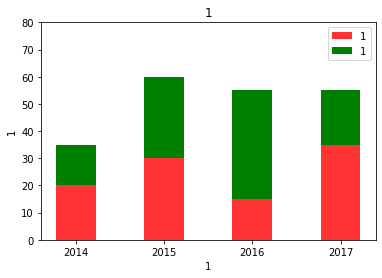

In [109]:
import matplotlib.pyplot as plt
import matplotlib


label_list = ['2014', '2015', '2016', '2017']
num_list1 = [20, 30, 15, 35]
num_list2 = [15, 30, 40, 20]
x = np.arange(len(num_list1))
rects1 = plt.bar(x, height=num_list1, width=0.45, alpha=0.8, color='red', label="1")
rects2 = plt.bar(x, height=num_list2, width=0.45, color='green', label="1", bottom=num_list1)
plt.ylim(0, 80)
plt.ylabel("1")
plt.xticks(x, label_list)
plt.xlabel("1")
plt.title("1")
plt.legend()
plt.show()